<a href="https://colab.research.google.com/github/rjgeng/CutTheKnot-Java/blob/master/Sprint_2_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100.05627925888686 14.941270975376503


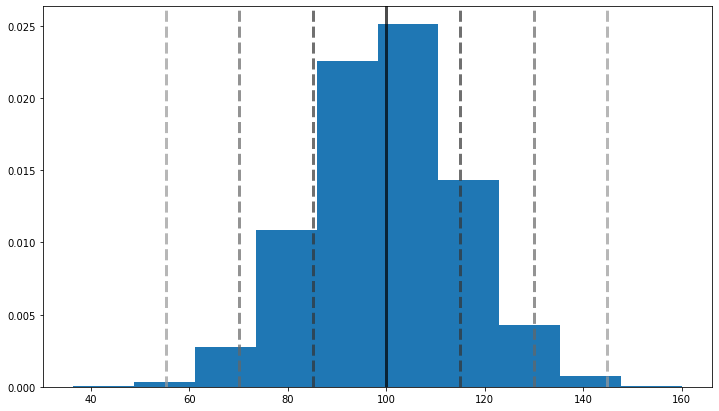

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency, t

#Set mean and standard deviation
mu, sigma = 100, 15

#Here is a set of points
xpoints=np.random.normal(mu, sigma, 50000)

avg=np.mean(xpoints)
std=np.std(xpoints)

#check your values
print(avg,std)

#Define variables for 1,2,3 sigma
std1 = avg + std
std1_neg = avg - std
std2 = avg + 2*std
std2_neg = avg - 2*std
std3 = avg + 3*std
std3_neg = avg - 3*std



#Start Figure
#---------------------------------------
# initialize a matplotlib "figure"
fig, ax = plt.subplots(figsize=(12,7))

# 68%:
ax.axvline(std1_neg, ls='dashed', lw=3, color='#333333', alpha=0.7)
ax.axvline(std1, ls='dashed', lw=3, color='#333333', alpha=0.7)

# 95%
ax.axvline(std2_neg, ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(std2, ls='dashed', lw=3, color='#666666', alpha=0.7)

# 99.7%
ax.axvline(std3, ls='dashed', lw=3, color='#999999', alpha=0.7)
ax.axvline(std3_neg, ls='dashed', lw=3, color='#999999', alpha=0.7)

#mean
ax.axvline(avg, lw=3, color = 'black',  alpha=0.7)



# plot the lines using matplotlib's hist function:
ax.hist(xpoints, density=True, bins= 10)


plt.show();

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
ave = titanic['fare'].mean()
sem = titanic['fare'].sem()
number = titanic['fare'].count() - 1 

In [ ]:

print("Confidence Interval at 90%:",  t.interval(alpha= .90, loc = ave, scale = sem, df= number))
print("Confidence Interval at 95%:",  t.interval(alpha= .95, loc = ave, scale = sem, df= number))

print("Confidence Interval at 99%:",  t.interval(alpha= .99, loc = ave, scale = sem, df= number))

Confidence Interval at 90%: (29.463014713022083, 34.94540122412712)
Confidence Interval at 95%: (28.936831234567297, 35.47158470258191)
Confidence Interval at 99%: (27.906771408671624, 36.50164452847758)


In [ ]:
#titanic is the population

ave

32.2042079685746

In [ ]:
ttest_1samp(titanic['fare'], 32)

Ttest_1sampResult(statistic=0.12266271558913089, pvalue=0.9024018818220448)

In [ ]:

titanic['fare'].sample(40).head()

871    52.5542
211    21.0000
465     7.0500
514     7.4958
816     7.9250
Name: fare, dtype: float64

In [ ]:
ttest_1samp(titanic['fare'].sample(40), 32)

Ttest_1sampResult(statistic=-0.5539190214270919, pvalue=0.5827965603276601)

In [ ]:
ttest_1samp(titanic['fare'], 28)


#significance 0.05
#null hypothesis sample mean to be equal to 28
#alternative hypothesis is that the sample mean will not be equal to 28 

Ttest_1sampResult(statistic=2.5253645581335165, pvalue=0.011730468284288484)

In [ ]:
male_titanic = titanic[titanic['sex'] == 'male']
female_titanic = titanic[titanic['sex'] == 'female']

print(male_titanic['fare'].mean())
female_titanic['fare'].mean()

25.523893414211418


44.47981783439487

In [ ]:
ttest_ind(male_titanic['fare'], female_titanic['fare'])

Ttest_indResult(statistic=-5.529140269385719, pvalue=4.2308678700429995e-08)

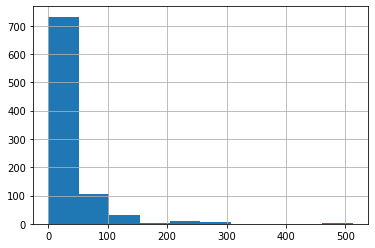

In [ ]:
titanic['fare'].hist()

In [ ]:
joint = pd.crosstab(titanic['sex'], titanic['survived'])
g, p, df, expct = chi2_contingency(joint)

In [ ]:
display(joint)
pd.DataFrame(expct)

survived,0,1
sex,,
female,81,233
male,468,109


,0,1
0,193.474747,120.525253
1,355.525253,221.474747


In [ ]:
from statsmodels.formula.api import ols

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
model = ols('fare ~ C(survived) + age + C(pclass)', data= titanic ).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     109.1
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           2.02e-72
Time:                        18:08:20   Log-Likelihood:                -3675.1
No. Observations:                 714   AIC:                             7360.
Df Residuals:                     709   BIC:                             7383.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          101.6462      6.376  

In [ ]:
dummied = pd.get_dummies(titanic['pclass'], drop_first = True)

titanic = pd.concat([titanic, dummied], axis = 1)



In [ ]:
titanic['age'].fillna(0, inplace = True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'survived', 'age']]
y = titanic['fare']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, )
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.34435848774471634
0.2627857923859215


In [ ]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
dummied = pd.get_dummies(titanic['embarked'], drop_first = True)
titanic = pd.concat([titanic, dummied], axis = 1)


In [ ]:

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,2,3,Q,S
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,1,0,1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'survived', 'age', 'Q', 'S']]
y = titanic['fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, )
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.315662671900491
0.36302181256925514
